# Lecture 2: Linear Regression

In this chapter, we introduce the following topics:
- linear regression model
- polynomial regression model
- regualarization 

To solve linear model, there are two approaches:
- normal equation
- gradient descent

## 1. Normal Equation

### 1.1 Univariate Linear Regression with One Parameter

First, we fix $\theta_0$ = 0. 

So the linear model is: $h_\theta(x) = \theta_1x$

We want to use normal equation to find out the value for $\theta_1$ to minimize the cost function.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
X_3 = np.array([[1,1],[1,2], [1,3]])
print(X_3)

[[1 1]
 [1 2]
 [1 3]]


In [3]:
# compute X transpose
X_3_T = np.transpose(X_3)
print(X_3_T)

[[1 1 1]
 [1 2 3]]


In [4]:
y_3 = np.array([1,2,3])
print(y_3)

[1 2 3]


In [5]:
# compute dot product of X transpose and X
X_T_dot_X = np.dot(X_3_T, X_3)
print(X_T_dot_X)

[[ 3  6]
 [ 6 14]]


In [6]:
# compute the inverse of the dot production
inv_dot = np.linalg.inv(X_T_dot_X)
print(inv_dot)

[[ 2.33333333 -1.        ]
 [-1.          0.5       ]]


In [8]:
# compute the dot product of X transpose and y
X_T_doy_y = np.dot(X_3_T, y_3)

In [9]:
# compute the final dot product
theta = np.dot(inv_dot, X_T_doy_y)
print(theta)

[0. 1.]


### 1.2 Univariate Linear Regression with two parameters

#### step 1. fake data

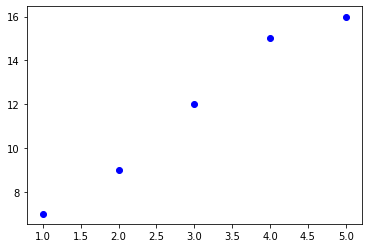

In [13]:
x_5 =  np.array([1,2,3,4,5]) 
y_5 =  np.array([7,9,12,15,16])   
plt.scatter(x_5, y_5, color='blue')
plt.show()

#### 2. compute $\theta$ using normal equation

In [14]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [15]:
x_5_bias = np.ones((5,1))
x_5_col = np.reshape(x_5,(5,1)) # column vector
x_5_b = np.append(x_5_bias, x_5_col, axis=1)

In [17]:
theta_5 = normal_equation(x_5_b, y_5)
print(theta_5)

[4.6 2.4]


#### 3. visualizing results

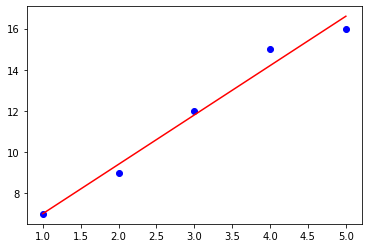

In [19]:
# x =  np.array([1,2,3,4,5]) 
# y =  np.array([7,9,12,15,16])
plt.scatter(x_5, y_5, color='blue')
y_5_hat = theta_5[0] + theta_5[1]*x_5            
plt.plot(x_5, y_5_hat, color='red')
plt.show()

### 3. Bigger examples 

In [20]:
import numpy as np

np.random.seed(42)

X_100 = 2 * np.random.rand(100, 1)
y_100 = 4 + 3 * X_100 + np.random.randn(100, 1)

#### 1. generate data

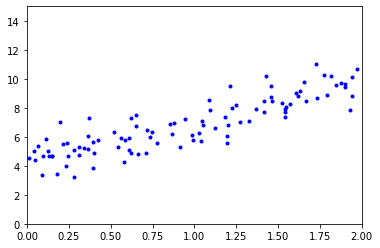

In [21]:
plt.plot(X_100, y_100, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### 2. Use normal equation to compute $\theta$

In [22]:
X_100_b = np.c_[np.ones((100, 1)), X_100] # add x0 = 1 to each instance
theta_100 = normal_equation(X_100_b, y_100)  # normal equation
print(theta_100)

[[4.21509616]
 [2.77011339]]


#### 3. visulization

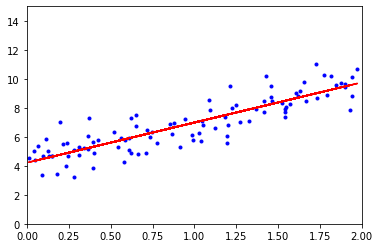

In [23]:
plt.scatter(X_100,y_100,color='blue', marker='.')
y_100_hat = theta_100[0] + theta_100[1]*X_100           
plt.plot(X_100,y_100_hat,color='r')
plt.axis([0, 2, 0, 15])
plt.show()

#### 4. use model to make prediction

In [24]:
# compute two points
X_100_new = np.array([[0], [2]])
X_100_new_b = np.c_[np.ones((2, 1)), X_100_new] # add x0 = 1 to each instance
y_100_predict = X_100_new_b.dot(theta_100)
y_100_predict

array([[4.21509616],
       [9.75532293]])

### 1.4 Implementation using scikit-learn

In [27]:
# from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_100, y_100)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('intercept', lin_reg.intercept_)
print('coef', lin_reg.coef_)

intercept [4.21509616]
coef [[2.77011339]]


Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).

In [29]:
lin_reg.predict(X_100_new)

array([[4.21509616],
       [9.75532293]])

#### scikit-learn internal implementation under the hood

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”). The least squares solution is computed using the singular value decomposition of X. 

In [31]:
theta_100_svd, residuals, rank, s = np.linalg.lstsq(X_100_b, y_100, rcond=1e-6)

In [32]:
theta_100_svd

array([[4.21509616],
       [2.77011339]])

In [33]:
residuals

array([80.6584564])

In [34]:
rank

2

In fact, this function computes $\hat{\theta} = X^+y$, where $X^+$ isthe pseudo-inverse (also called Moore-Penrose Inverse) of X. 

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices $U\Sigma V^T$. Then, we have:

$$X^+=V\Sigma^+U^T$$

To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

You can use `np.linalg.pinv()` to compute the pseudo-inverse directly.

In [36]:
np.linalg.pinv(X_100_b).dot(y_100)

array([[4.21509616],
       [2.77011339]])

Normal Equation may not work if the matrix $X^TX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudo-inverse is always defined.

## 2. Gradient Descent

### 2.1 Batch Gradient Descent

In [37]:
lr = 0.1 # learning rate
n_iterations = 1000
m = 100
theta_bgd = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_100_b.T.dot(X_100_b.dot(theta_bgd) - y_100)
    theta_bgd = theta_bgd - lr * gradients

In [38]:
theta_bgd

array([[4.21509616],
       [2.77011339]])

In [94]:
def plot_gradient_descent(theta, lr, theta_path=None):
    m = len(X_100_b)
    plt.plot(X_100, y_100, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_100_predict = X_100_b.dot(theta)
            style = "g-" if iteration > 0 else "r--"  # initial linear model is in red, others are in green
            alpha = 0.1 + iteration / 10  # the transparency increase from oldest one to the latest one
            plt.plot(X_100, y_100_predict, style, alpha=alpha)
        gradients = 2/m * X_100_b.T.dot(X_100_b.dot(theta) - y_100)
        theta = theta - lr * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(lr), fontsize=16)

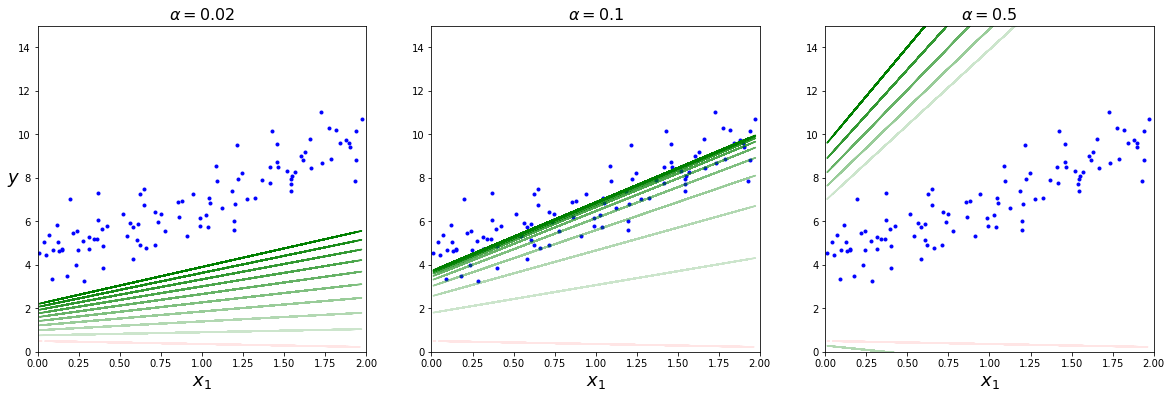

In [95]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

theta_path_bgd = []

plt.figure(figsize=(20,6))

plt.subplot(131); 
plot_gradient_descent(theta, lr=0.02)
# first figure (left-most) needs a y label
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(132); 
plot_gradient_descent(theta, lr=0.1, theta_path=theta_path_bgd)

plt.subplot(133); 
plot_gradient_descent(theta, lr=0.5)

plt.savefig("figures/Learning_rate.png")
plt.show()

### 2.2 Stochastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b_ex2[random_index:random_index+1]
        yi = y_ex2[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

#### Implementing using Scikit-learn

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_ex2, y_ex2.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

## backups

In [ ]:
import matplotlib

matplotlib.__version__

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# make data
theta_1 = np.arange(-4, 6, 0.1)
theta_0 = np.arange(-5, 5, 0.1)
theta_1, theta_0 = np.meshgrid(theta_1, theta_0)
loss = (14*theta_1**2 + 3*theta_0**2 + 12*theta_1*theta_0 - 28*theta_1 - 12*theta_0 + 14)/6

# plot surface
alpha = 0.8
surf = ax.plot_surface(theta_1, theta_0, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
X = np.arange(-4, 6, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (14*X**2 + 3*Y**2 + 12*X*Y - 28*X - 12*Y + 14)/6

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
"""
an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and 
an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis)
"""

ax.view_init(60, 35)
fig.savefig('figures/3d-60-35.png')
fig

In [ ]:
ax.view_init(0, 105)
fig

In [ ]:
ax.view_init(0, 195)
fig

In [ ]:
fig_color = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
ax.view_init(0, 120)
fig_color

#### step 3: plot the result for visualization

In [ ]:
X_housing = np.array([[1, 2140, 5, 1, 45], [1, 1416, 3, 2, 40], [1, 1534, 3, 2, 30], [1, 852, 2, 1, 36]])
y_housing = np.array([460, 232, 315, 178])
y_housing = np.reshape(y_housing,(4,1))

theta = normal_equation_2(X_housing, y_housing)
print(theta)

We can see the problem is the feature scaling.